<a href="https://colab.research.google.com/github/ruchiraravishankar/level-5-project/blob/main/iam_dataset_svm_binary_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import glob
import os

from bs4 import BeautifulSoup
# data_path = '/Users/ruchiraravishankar/Downloads/iam_dataset/'
data_path = '/content/drive/MyDrive/iam_dataset/'
import pickle

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
b_file = open("/content/drive/MyDrive/iam_dataset/d_i.pkl", "rb")
d_i = pickle.load(b_file)
print(d_i)

{'e01-062': '213', 'e01-059': '213', 'e01-086': '214', 'e01-092': '215', 'e01-102': '215', 'e01-113': '216', 'e01-107': '216', 'e02-014': '219', 'e01-119': '217', 'e02-000': '218', 'e02-018': '220', 'e02-021': '221', 'e02-025': '222', 'e02-074': '223', 'e02-082': '224', 'e02-086': '225', 'e02-091': '226', 'e02-094': '227', 'e02-100': '228', 'e02-117': '229', 'e04-000': '158', 'e04-008': '230', 'e04-011': '231', 'e04-004': '230', 'e04-015': '231', 'e04-022': '232', 'e04-019': '232', 'e04-026': '233', 'e04-030': '233', 'e04-038': '234', 'e04-034': '234', 'e04-052': '235', 'e04-043': '235', 'e04-058': '236', 'e04-062': '237', 'e04-079': '238', 'e04-068': '237', 'e04-083': '239', 'e04-086': '240', 'e04-091': '241', 'e04-095': '241', 'e04-109': '242', 'e04-103': '242', 'e04-099': '241', 'e04-114': '242', 'e04-119': '243', 'e04-124': '243', 'e04-127': '243', 'e04-132': '241', 'e06-000': '206', 'e06-006': '202', 'e06-003': '204', 'e06-021': '206', 'e06-010': '203', 'e06-015': '204', 'e06-030'

In [3]:
form_writer_list = list(d_i.items())

In [4]:
from collections import Counter

top_writers = []
num_writers = 50 # taking the top 50 writers
writers_counter = Counter(d_i.values())
for writer_id,_ in writers_counter.most_common(num_writers):
    top_writers.append(writer_id)

print(top_writers)

['000', '384', '551', '552', '588', '635', '670', '671', '152', '150', '151', '154', '153', '333', '334', '336', '337', '338', '339', '340', '341', '342', '343', '345', '344', '347', '346', '348', '349', '634', '155', '332', '335', '315', '118', '415', '209', '085', '567', '206', '202', '204', '203', '205', '207', '208', '247', '248', '273', '274']


In [5]:
import os
import glob
import shutil

# Create temp directory to save writers' forms in (assumes files have already been copied if the directory exists)
temp_sentences_path = data_path + "/temp_sentences"
if not os.path.exists(temp_sentences_path):
    os.makedirs(temp_sentences_path)
    # Copy forms that belong to the top 50 most common writers to the temp directory
    original_sentences_path = data_path + "/sentences/**/**/*.png"
    for file_path in glob.glob(original_sentences_path):
        image_name = file_path.split('/')[-1]  
        file_name, _ = os.path.splitext(image_name)
        form_id = '-'.join(file_name.split('-')[0:2])
        if form_id in top_forms:
            shutil.copy2(file_path, temp_sentences_path + "/" + image_name)

In [6]:
img_files = np.zeros((0), dtype=str)
print(img_files)
img_targets = np.zeros((0), dtype=str)
print(img_targets)
sentence_dict = {}
path_to_files = os.path.join(temp_sentences_path, '*')
for file_path in glob.glob(path_to_files):
    img_files = np.append(img_files, file_path)
    file_name, _ = os.path.splitext(file_path.split('/')[-1]  )
    form_id = '-'.join(file_name.split('-')[0:2])
    for key in d_i:
        if key == form_id:
            img_targets = np.append(img_targets, d_i[form_id])
#             sentence_dict[d_i[form_id]] = form_id

[]
[]


In [7]:
print(img_files.shape)
print(img_targets.shape)

print(Counter(img_targets).keys())
print(Counter(img_targets).values())

(4901,)
(4901,)
dict_keys(['551', '552', '567', '315', '588', '634', '635', '670', '671', '340', '339', '341', '342', '343', '344', '345', '346', '347', '348', '332', '333', '334', '335', '336', '337', '338', '349', '274', '118', '384', '415', '247', '248', '273', '150', '151', '152', '153', '154', '155', '202', '203', '204', '205', '206', '207', '208', '209', '085', '000'])
dict_values([129, 127, 87, 73, 133, 134, 95, 116, 129, 83, 91, 101, 95, 81, 99, 107, 105, 86, 87, 82, 104, 89, 71, 82, 75, 80, 84, 45, 52, 117, 87, 60, 54, 45, 104, 99, 101, 111, 108, 95, 63, 43, 60, 55, 50, 56, 53, 71, 54, 693])


(47, 95)
(80, 1203)


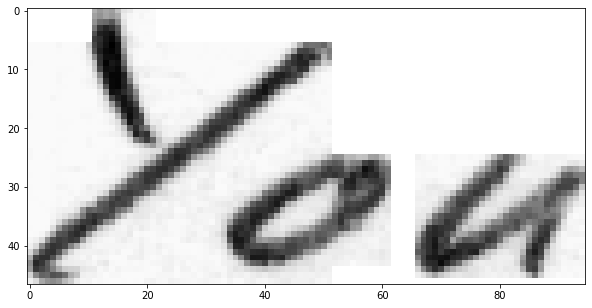

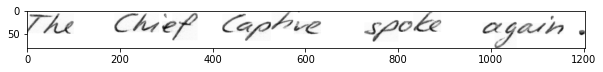

In [8]:
for file_name in img_files[:2]:
    img = mpimg.imread(file_name)
    plt.figure(figsize = (10,10))
    plt.imshow(img, cmap ='gray')
    print(img.shape)

In [9]:
labelled_data = np.stack([img_files, img_targets], axis=1)

print(labelled_data.shape)

(4901, 2)


In [10]:
from sklearn.utils import shuffle
from PIL import Image
import random

CROP_SIZE = 64
NUM_LABELS = 50

def get_augmented_sample(sample, label, sample_ratio):
    # Get current image details
    img = Image.open(sample)
    img_width = img.size[0]
    img_height = img.size[1]

    # Compute resize dimensions such that aspect ratio is maintained
    height_fac = CROP_SIZE / img_height
    size = (int(img_width * height_fac), CROP_SIZE)

    # Resize image 
    new_img = img.resize((size), Image.ANTIALIAS)
    new_img_width = new_img.size[0]
    new_img_height = new_img.size[1]

    # Generate a random number of crops of size 113x113 from the resized image
    x_coord = list(range(0, new_img_width - CROP_SIZE))
    num_crops = int(len(x_coord) * sample_ratio)
    random_x_coord = random.sample(x_coord, num_crops)
    
    # Create augmented images (cropped forms) and map them to a label (writer)
    images = []
    labels = []
    for x in random_x_coord:
        img_crop = new_img.crop((x, 0, x + CROP_SIZE, CROP_SIZE))
        # Transform image to an array of numbers
        images.append(np.asarray(img_crop))
        labels.append(label)

    return images, labels

In [11]:
labelled_data_0 = labelled_data[labelled_data[:,1] == '000']

print(labelled_data_0.shape)

labelled_data_0 = labelled_data_0[:98]
print(labelled_data_0.shape)

print(np.unique(labelled_data_0[:,1]))

(693, 2)
(98, 2)
['000']


In [12]:
remove_000 = labelled_data[labelled_data[:,1]!='000']

print(np.unique(remove_000[:,1]))
print(np.unique(remove_000[:,1]).shape)

['085' '118' '150' '151' '152' '153' '154' '155' '202' '203' '204' '205'
 '206' '207' '208' '209' '247' '248' '273' '274' '315' '332' '333' '334'
 '335' '336' '337' '338' '339' '340' '341' '342' '343' '344' '345' '346'
 '347' '348' '349' '384' '415' '551' '552' '567' '588' '634' '635' '670'
 '671']
(49,)


In [13]:
y = [remove_000[remove_000[:,1]==k] for k in np.unique(remove_000[:,1])]
print(len(y))

49


In [14]:
labelled_data_1 = []
for i in y:
    labelled_data_1.append(i[:2])
print(len(labelled_data_1))

labelled_data_1 = np.array(labelled_data_1)

print(labelled_data_1.shape)

49
(49, 2, 2)


In [15]:
labelled_data_1=labelled_data_1.reshape(-1,2)

In [16]:
print(labelled_data_1.shape)
print(np.unique(labelled_data_1[:,1]))

(98, 2)
['085' '118' '150' '151' '152' '153' '154' '155' '202' '203' '204' '205'
 '206' '207' '208' '209' '247' '248' '273' '274' '315' '332' '333' '334'
 '335' '336' '337' '338' '339' '340' '341' '342' '343' '344' '345' '346'
 '347' '348' '349' '384' '415' '551' '552' '567' '588' '634' '635' '670'
 '671']


In [17]:
labelled_data_new = np.concatenate((labelled_data_0, labelled_data_1))
np.random.shuffle(labelled_data_new)
print(labelled_data_new.shape) # mix of sentences from writer id 0 and others, labelled

(196, 2)


In [18]:
# split before augmenting to ensure the sentences are being split and not the augmented samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(labelled_data_new[:,0], labelled_data_new[:,1], test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(131,) (65,) (131,) (65,)


In [19]:
def augment(data, labels):
    augmented_sample_list = []
    augmented_label_list = []
    for i in range(len(data)):
        augmented_samples, augmented_labels = get_augmented_sample(data[i], labels[i],0.05)
        augmented_sample_list.append(augmented_samples)
        augmented_label_list.append(augmented_labels)
    return augmented_sample_list, augmented_label_list

In [20]:
augsamps, auglbls = augment(X_train, y_train) # returns two lists of arrays
ausamps_test, auglbls_test = augment(X_test, y_test)

In [21]:
import operator
from functools import reduce

# flattening the lists
aug_samps = reduce(operator.add, augsamps)
aug_lbls = reduce(operator.add, auglbls)

aug_samps_test = reduce(operator.add, ausamps_test)
aug_lbls_test = reduce(operator.add, auglbls_test)
print(len(aug_samps))
print(len(aug_lbls))

print(len(aug_samps_test))
print(len(aug_lbls_test))

11230
11230
5679
5679


In [22]:
# converting lists to arrays
aug_samps_arr = np.array(aug_samps)
aug_lbls_arr = np.array(aug_lbls)
aug_samps_arr_test = np.array(aug_samps_test)
aug_lbls_arr_test = np.array(aug_lbls_test)

print(aug_samps_arr.shape)
print(aug_lbls_arr.shape)
print(aug_samps_arr_test.shape)
print(aug_lbls_arr_test.shape)

(11230, 64, 64)
(11230,)
(5679, 64, 64)
(5679,)


In [24]:
X_train = aug_samps_arr.reshape(-1, CROP_SIZE*CROP_SIZE)
# X_train = X_train.reshape(X_train.shape[0], 1, CROP_SIZE, CROP_SIZE)
X_train = X_train.astype('float32')
# X_data /= 255
y_train = aug_lbls_arr


X_test = aug_samps_arr_test.reshape(-1, CROP_SIZE*CROP_SIZE)
# X_test = X_test.reshape(X_test.shape[0], 1, CROP_SIZE, CROP_SIZE)
X_test = X_test.astype('float32')

y_test = aug_lbls_arr_test

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11230, 4096)
(11230,)
(5679, 4096)
(5679,)


In [25]:
new = np.unique(y_train)
print(new)

y_train[y_train !='000'] = 1
new = np.unique(y_train)
print(new)

y_train[y_train=='000'] = 0
new = np.unique(y_train)
print(new)

print(y_train.shape)

y_train = y_train.astype('float32')

print(np.unique(y_train))

['000' '085' '118' '150' '152' '153' '154' '202' '203' '204' '205' '206'
 '207' '208' '209' '247' '273' '274' '315' '332' '333' '334' '335' '336'
 '337' '338' '339' '341' '342' '343' '344' '345' '346' '347' '348' '384'
 '415' '551' '552' '567' '588' '634' '635' '670' '671']
['000' '1']
['0' '1']
(11230,)
[0. 1.]


In [26]:
new = np.unique(y_test)
print(new)

y_test[y_test !='000'] = 1
new = np.unique(y_test)
print(new)

y_test[y_test=='000'] = 0
new = np.unique(y_test)
print(new)

print(y_test.shape)

y_test = y_test.astype('float32')

print(np.unique(y_test))

['000' '118' '151' '152' '155' '202' '203' '205' '207' '208' '247' '248'
 '274' '315' '332' '335' '337' '339' '340' '342' '344' '345' '348' '349'
 '384' '415' '551' '588' '670' '671']
['000' '1']
['0' '1']
(5679,)
[0. 1.]


In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
model.fit(X_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete


In [ ]:
y_pred=model.predict(X_test)
print("The predicted Data is :")
y_pred

In [ ]:
result_df = pd.DataFrame({'ground truth': y_test, 'SVM output': y_pred})
result_df

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
actual = result_df['ground truth']
predicted = result_df['SVM output']
# confusion matrix
matrix = confusion_matrix(actual, predicted, labels=[0,1])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual, predicted, labels=[0,1]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix_2 = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)